Потеря данных после очистки: 79.46%

Метрики классификации:
Точность (Accuracy): 0.73
Precision: 0.74
Recall: 0.87
F1-score: 0.80


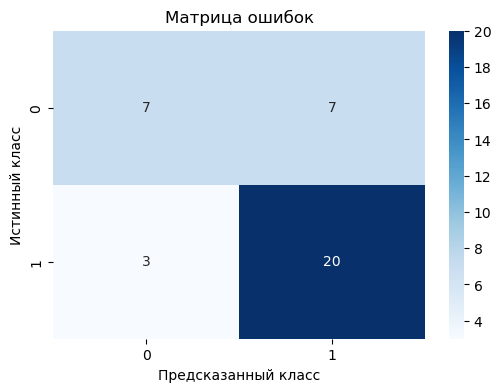

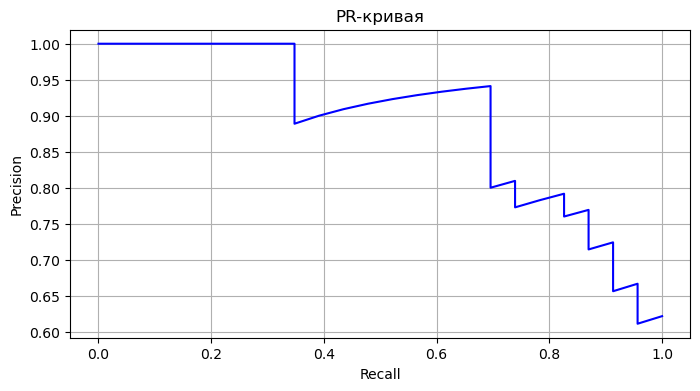

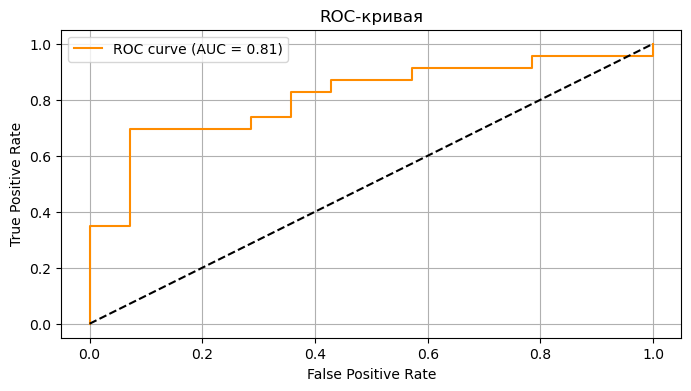

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt


def preprocess_titanic_data():
    """Функция для загрузки и предобработки данных Titanic"""
    # Загрузка исходных данных
    raw_data = pd.read_csv("Titanic.csv")

    # Удаление строк с пропущенными значениями
    cleaned_data = raw_data.dropna()

    # Удаление нерелевантных столбцов
    irrelevant_columns = ['Name', 'Ticket', 'Cabin', 'PassengerId']
    cleaned_data = cleaned_data.drop(irrelevant_columns, axis=1)

    # Кодирование категориальных признаков
    cleaned_data['Sex'] = cleaned_data['Sex'].map({'male': 0, 'female': 1})
    cleaned_data['Embarked'] = cleaned_data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

    # Расчет потери данных
    initial_count = raw_data.shape[0]
    cleaned_count = cleaned_data.shape[0]
    loss_percentage = ((initial_count - cleaned_count) / initial_count) * 100
    print(f"Потеря данных после очистки: {loss_percentage:.2f}%")

    return cleaned_data


def evaluate_classification_model(X, y):
    """Функция для обучения и оценки модели классификации"""
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация и обучение модели
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train, y_train)

    # Предсказание классов и вероятностей
    y_pred = classifier.predict(X_test)
    y_proba = classifier.predict_proba(X_test)[:, 1]

    # Вычисление метрик качества
    print("\nМетрики классификации:")
    print(f"Точность (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

    # Построение матрицы ошибок
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Матрица ошибок')
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.show()

    # Построение PR-кривой
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 4))
    plt.plot(recall, precision, color='blue')
    plt.title('PR-кривая')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.show()

    # Построение ROC-кривой
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC-кривая')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Предобработка данных
titanic_data = preprocess_titanic_data()

# Подготовка признаков и целевой переменной
features = titanic_data.drop('Survived', axis=1)
target = titanic_data['Survived']

# Оценка модели
evaluate_classification_model(features, target)